# Assignment 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing the data
data = np.loadtxt('ex1data1.txt', delimiter=',')
x = data[:,0].reshape(-1,1)
y = data[:,1]

Text(0, 0.5, 'Profit in $10,000')

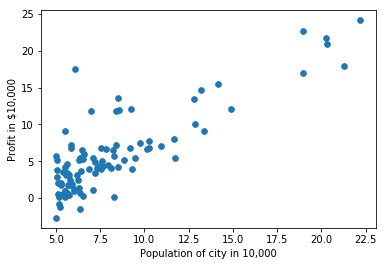

In [3]:
#Visualizing the Data
plt.scatter(x, y, s=32, marker='o')
plt.xlabel("Population of city in 10,000")
plt.ylabel("Profit in $10,000")

In [4]:
#Now we train the data using scikit learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=0)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
y_pred = linreg.predict(X_test)

In [6]:
#Using the Score method to check the performance of the training model where 0 means poor performance and 1 means perfect
linreg.score(X_train,y_train)

0.7309173021712548

In [7]:
#Calculating the Cost function which is the Mean Squared Error
mse = metrics.mean_squared_error(y_test,y_pred)
print("The cost function is:",mse)

The cost function is: 9.829068168755807


In [8]:
linreg.coef_

array([1.20934991])

In [9]:
linreg.intercept_

-4.106160513581716

In [10]:
print('Our learned value of theta: ',[*linreg.coef_, linreg.intercept_])

Our learned value of theta:  [1.209349914700653, -4.106160513581716]


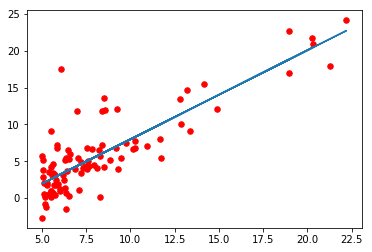

In [11]:
plt.figure()
x_plot = X_train
y_plot = linreg.intercept_ + X_train*linreg.coef_
plt.scatter(x, y, s=30, c='r', marker='o', linewidths=1)
plt.plot(x_plot,y_plot, label='Linear regression (S. Gradient descent)')

In [12]:
def predict():
    input_ = float(input("Input the population size/10000: "))
    print("For a population of ", input_, ", the profit is $", ((input_ * 1.209349914700653) - 4.106160513581716) * 10000)

In [13]:
predict()

Input the population size/10000: 5.5
For a population of  5.5 , the profit is $ 25452.64017271876


In [14]:
def predict_inverse():
    input_ = float(input("Input the profit in $: "))
    print("For a profit of $", input_, ", the population size is ", ((input_/10000 + 4.106160513581716)/ 1.209349914700653)*10000)

In [16]:
predict_inverse()

Input the profit in $: 25452.64017271876
For a profit of $ 25452.64017271876 , the population size is  55000.0


## Comparison
Given a population of 55000, scikit learn predicted a profit(in $) of 25452.64 as opposed to defining the functions that we did in class which gave us 26854.59. So the values are close but not exact.

# Assignment 2

In [17]:
#data = np.loadtxt("Apple.txt", delimiter = ",")
data = pd.read_csv("Apple.txt", sep=',', header = None)
data.columns=["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]

## The Data in consideration
The data being considered for this analysis is the stock value for Apple Inc since the beginning of March 2019. The algorithm will create a model that tells the High for that day given the day's opening price which will be very useful for daily stock traders. 

In [18]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,174.279999,175.149994,172.889999,174.970001,174.970001,25886200
1,2019-03-04,175.690002,177.750000,173.970001,175.850006,175.850006,27436200
2,2019-03-05,175.940002,176.000000,174.539993,175.529999,175.529999,19737400
3,2019-03-06,174.669998,175.490005,173.940002,174.520004,174.520004,20810400
4,2019-03-07,173.869995,174.440002,172.020004,172.500000,172.500000,24796400


In [19]:
data = data.values

In [20]:
x_1 = np.c_[data[:,1], np.ones(data.shape[0])]
y_1 = np.c_[data[:,2]]

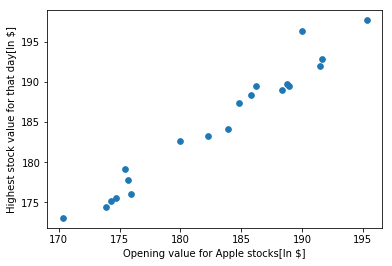

In [21]:
plt.scatter(x_1[:,0],y_1, s=32, marker='o')
plt.xlabel('Opening value for Apple stocks[In $]')
plt.ylabel('Highest stock value for that day[In $]')
plt.show()

In [22]:
def train(x_1, y_1):
    iteration = 200
    theta = [[0],[0]]
    cost_function = np.zeros(iteration)
    
    for i in range(iteration):
        h = np.dot(x_1, theta)
        theta = update_weight(h, theta, x_1)
        cost_function[i] = cost(x_1, theta)

        print("The cost function is ", cost_function[i])
        
    return theta, cost_function

In [23]:
def cost(x_1, theta):
    m = x_1[:,0].size
    h = np.dot(x_1, theta)
    return (1/2*m) * np.sum(np.square(h - y_1))

In [24]:
def update_weight(h, theta, x_1):
    m = x_1[:,0].size
    alpha = 0.01
    theta = theta - alpha * (1/m * np.dot((x_1.T), (h - y_1)))
    return theta

In [25]:
theta, cost_values = train(x_1,y_1)

The cost function is  762218254536.7084
The cost function is  8.504218028495621e+16
The cost function is  9.488322260336575e+21
The cost function is  1.0586306585077621e+27
The cost function is  1.1811349155133194e+32
The cost function is  1.3178153092705152e+37
The cost function is  1.470312295859109e+42
The cost function is  1.6404561641882673e+47
The cost function is  1.8302890033650066e+52
The cost function is  2.0420892121164968e+57
The cost function is  2.278398844431532e+62
The cost function is  2.5420541196271695e+67
The cost function is  2.836219463026356e+72
The cost function is  3.1644254858072424e+77
The cost function is  3.5306113598633564e+82
The cost function is  3.9391720962632543e+87
The cost function is  4.395011294751963e+92
The cost function is  4.903599997400679e+97
The cost function is  5.471042352773968e+102
The cost function is  6.10414887872444e+107
The cost function is  6.810518203124613e+112
The cost function is  7.598628263599009e+117
The cost function is  8

C:\Users\Acer\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.


In [26]:
print('Our learned value of theta: ',theta.ravel())

Our learned value of theta:  [nan nan]


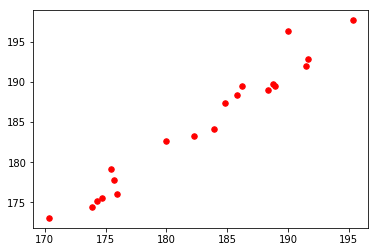

In [27]:
x_plot = np.arange(170,200)
y_plot = theta[0]*x_plot + theta[1]
# Plot gradient descent
plt.scatter(x_1[:,0], y_1, s=30, c='r', marker='o', linewidths=1)
plt.plot(x_plot,y_plot, label='Linear regression (Gradient descent)')

## Using Scikit Learn method

In [28]:
x_1 = x_1[:,0].reshape(-1,1)

In [29]:
X_train,X_test,y_train,y_test = train_test_split(x_1,y_1,random_state=0)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
y_pred = linreg.predict(X_test)

In [31]:
linreg.score(X_train,y_train)

0.9608048532715984

In [32]:
mse = metrics.mean_squared_error(y_test,y_pred)
print("The cost function is:",mse)

The cost function is: 0.9391515815926248


In [33]:
print('Our learned value of theta: ',[*linreg.coef_, linreg.intercept_])

Our learned value of theta:  [array([1.03731254]), array([-4.91523939])]


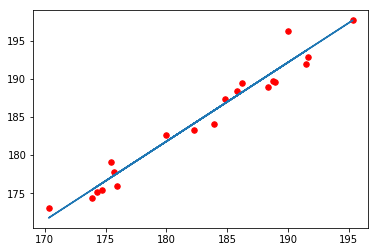

In [34]:
plt.figure()
x_plot = X_train
y_plot = linreg.intercept_ + X_train*linreg.coef_
plt.scatter(x_1, y_1, s=30, c='r', marker='o', linewidths=1)
plt.plot(x_plot,y_plot, label='Linear regression (S. Gradient descent)')

In [35]:
def predict():
    input_ = float(input("Input Apple's opening stock price (in $): "))
    print("Given the opening price of ", input_, ", the stock will hit a high of $",((input_ * 1.03731254) - 4.91523939), " today")

In [36]:
predict()

Input Apple's opening stock price (in $): 180
Given the opening price of  180.0 , the stock will hit a high of $ 181.80101781  today


## Remarks
The Algorithm for the univariate linear regression gave me error which may have been due to an ommision I made but the scikit learn gave me the right prediction. 